In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
# Mapping lets you format an entire DataFrame
file = "data/May2018-May2019.csv"
file_df = pd.read_csv(file)
file_df.head()

,date,id,host_id,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count
0,5/9/18,2515,2758,Harlem,Private room,59.0,2,3
1,5/9/18,2539,2787,Kensington,Private room,79.0,1,7
2,5/9/18,2595,2845,Midtown,Entire home/apt,225.0,1,2
3,5/9/18,3330,4177,Williamsburg,Private room,70.0,5,3
4,5/9/18,3647,4632,Harlem,Private room,150.0,3,1


In [64]:
file_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644496 entries, 0 to 644495
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            644496 non-null  object 
 1   id                              644496 non-null  int64  
 2   host_id                         644496 non-null  int64  
 3   neighbourhood                   644496 non-null  object 
 4   room_type                       644496 non-null  object 
 5   price                           644496 non-null  float64
 6   minimum_nights                  644496 non-null  int64  
 7   calculated_host_listings_count  644496 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 39.3+ MB


In [65]:
# Format necessary columns
file_df['date']=pd.to_datetime(file_df['date'])
file_df.price = file_df.price.astype(int)

file_df.head()

,date,id,host_id,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count
0,2018-05-09,2515,2758,Harlem,Private room,59,2,3
1,2018-05-09,2539,2787,Kensington,Private room,79,1,7
2,2018-05-09,2595,2845,Midtown,Entire home/apt,225,1,2
3,2018-05-09,3330,4177,Williamsburg,Private room,70,5,3
4,2018-05-09,3647,4632,Harlem,Private room,150,3,1


In [66]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644496 entries, 0 to 644495
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            644496 non-null  datetime64[ns]
 1   id                              644496 non-null  int64         
 2   host_id                         644496 non-null  int64         
 3   neighbourhood                   644496 non-null  object        
 4   room_type                       644496 non-null  object        
 5   price                           644496 non-null  int64         
 6   minimum_nights                  644496 non-null  int64         
 7   calculated_host_listings_count  644496 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 39.3+ MB


In [67]:
print(file_df.shape)

(644496, 8)


In [68]:
file_df.describe()

,id,host_id,price,minimum_nights,calculated_host_listings_count
count,6.444960e+05,6.444960e+05,644496.000000,644496.000000,644496.000000
mean,1.620088e+07,5.550720e+07,150.837322,6.817555,4.502957
std,9.270845e+06,6.421395e+07,270.246080,125.969881,17.532499
min,2.454000e+03,2.830000e+02,0.000000,1.000000,1.000000
25%,8.303337e+06,7.040483e+06,69.000000,1.000000,1.000000
50%,1.667857e+07,2.655670e+07,105.000000,2.000000,1.000000
75%,2.346603e+07,8.375453e+07,175.000000,5.000000,2.000000
max,3.530389e+07,2.657038e+08,97598.000000,50000.000000,297.000000


In [69]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644496 entries, 0 to 644495
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            644496 non-null  datetime64[ns]
 1   id                              644496 non-null  int64         
 2   host_id                         644496 non-null  int64         
 3   neighbourhood                   644496 non-null  object        
 4   room_type                       644496 non-null  object        
 5   price                           644496 non-null  int64         
 6   minimum_nights                  644496 non-null  int64         
 7   calculated_host_listings_count  644496 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 39.3+ MB


In [70]:
file_df.isna().sum()

date                              0
id                                0
host_id                           0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
dtype: int64

In [71]:
file_df.head(10)

,date,id,host_id,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count
0,2018-05-09,2515,2758,Harlem,Private room,59,2,3
1,2018-05-09,2539,2787,Kensington,Private room,79,1,7
2,2018-05-09,2595,2845,Midtown,Entire home/apt,225,1,2
3,2018-05-09,3330,4177,Williamsburg,Private room,70,5,3
4,2018-05-09,3647,4632,Harlem,Private room,150,3,1
5,2018-05-09,3831,4869,Clinton Hill,Entire home/apt,89,1,1
6,2018-05-09,4484,5688,East Village,Entire home/apt,85,1,1
7,2018-05-09,4989,7118,Hell's Kitchen,Entire home/apt,175,2,1
8,2018-05-09,5099,7322,Murray Hill,Entire home/apt,185,2,1
9,2018-05-09,5172,7386,Murray Hill,Entire home/apt,129,3,1


In [72]:
file_df["minimum_nights"].interpolate(inplace=True)

In [73]:
print(file_df["minimum_nights"].isna().sum())
file_df["minimum_nights"].sample(10)

0


170092     2
11548      1
538613    30
234174     4
637900     2
121418     3
178708     2
360362    56
343489     1
260649     1
Name: minimum_nights, dtype: int64

In [74]:
file_df.neighbourhood.value_counts()

Williamsburg              53729
Bedford-Stuyvesant        47188
Harlem                    36146
Bushwick                  31866
Upper West Side           27293
                          ...  
Hollis Hills                  4
Chelsea, Staten Island        3
Port Ivory                    2
Country Club                  2
Charleston                    1
Name: neighbourhood, Length: 229, dtype: int64

In [75]:
file_df.room_type.value_counts()

Entire home/apt    335277
Private room       294527
Shared room         14692
Name: room_type, dtype: int64

Text(0.5, 1.0, 'ID...')

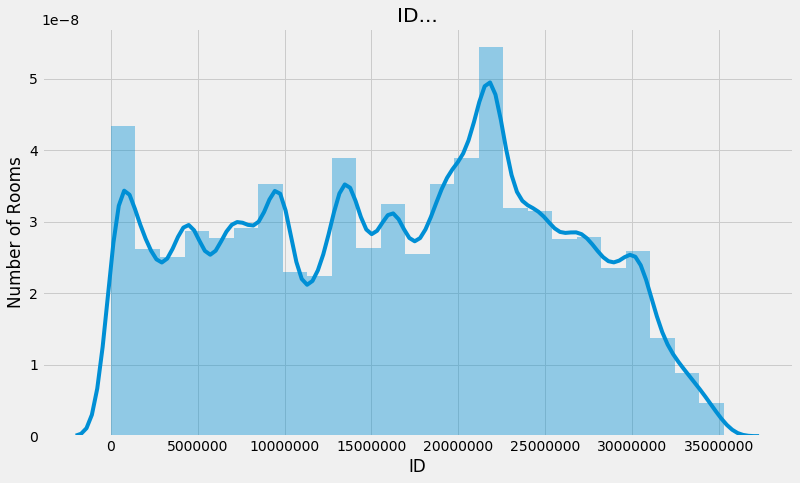

In [76]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.distplot(file_df.id, bins = 25)
plt.ticklabel_format(style="plain", axis = "x", scilimits=(0,1))
plt.xlabel("ID")
plt.ylabel("Number of Rooms")
plt.title("ID...")

In [77]:
print("Skew is:", file_df.id.skew())
print("Kurtosis: %f" % file_df.id.kurt())

Skew is: -0.06220033188901981
Kurtosis: -1.084429


In [78]:
numeric_features = file_df.select_dtypes(include=[np.number])
numeric_features.dtypes

id                                int64
host_id                           int64
price                             int64
minimum_nights                    int64
calculated_host_listings_count    int64
dtype: object

In [79]:
corr = numeric_features.corr()
corr

,id,host_id,price,minimum_nights,calculated_host_listings_count
id,1.000000,0.571063,-0.005535,-0.000283,0.101571
host_id,0.571063,1.000000,0.003784,0.001657,0.091099
price,-0.005535,0.003784,1.000000,0.003741,0.041356
minimum_nights,-0.000283,0.001657,0.003741,1.000000,0.024988
calculated_host_listings_count,0.101571,0.091099,0.041356,0.024988,1.000000


In [80]:
print(corr["price"].sort_values(ascending=False))

price                             1.000000
calculated_host_listings_count    0.041356
host_id                           0.003784
minimum_nights                    0.003741
id                               -0.005535
Name: price, dtype: float64


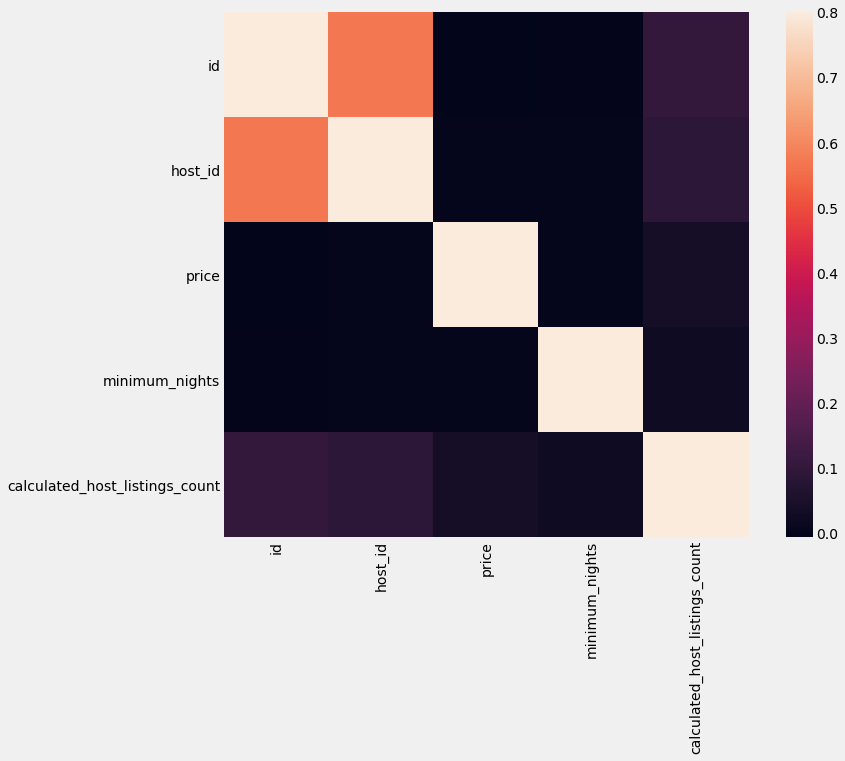

In [81]:
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=.8, square=True);

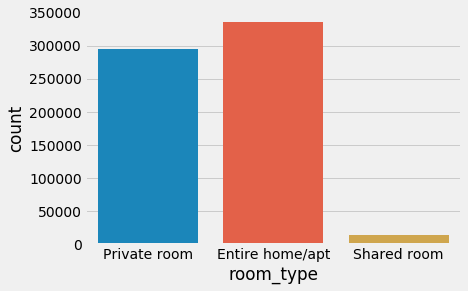

In [82]:
sns.countplot(file_df.room_type)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

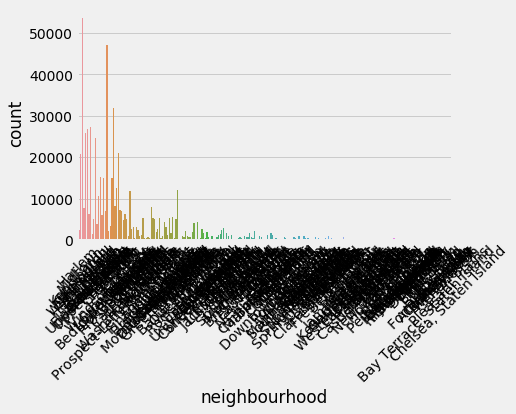

In [83]:
# Need Help with label
sns.countplot(file_df.neighbourhood)
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145]),
 <a list of 146 Text xticklabel objects>)

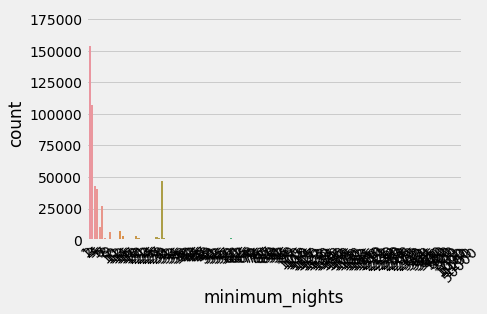

In [84]:
# Need Help with label
sns.countplot(file_df.minimum_nights)
plt.xticks(rotation=45)

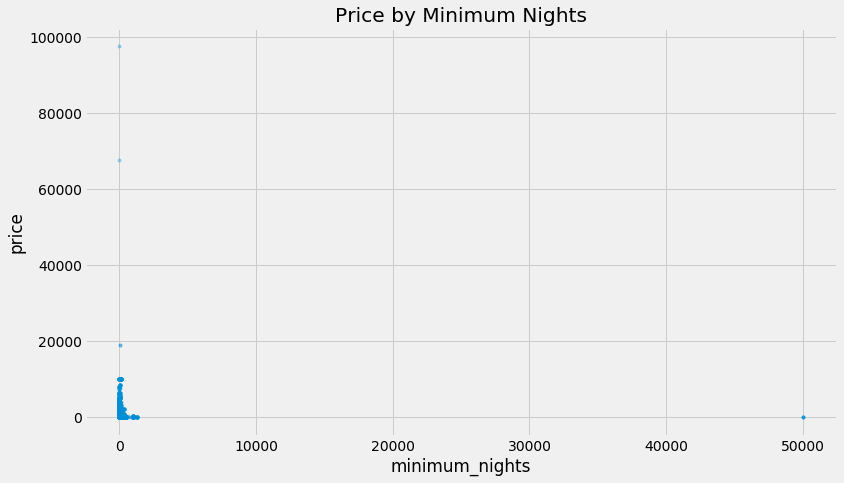

In [86]:
plt.figure(figsize=(12,7))
plt.xlabel("minimum_nights")
plt.ylabel("price")
plt.title("Price by Minimum Nights")
plt.plot(file_df.minimum_nights, file_df["price"],".",alpha=.3)

In [89]:
test=pd.read_csv("data/June2019-May2020.csv")

In [91]:
file_df['source']='train'
test['source']='test'
data=pd.concat([file_df, test],ignore_index = True)
print(file_df.shape, test.shape,data.shape)

(644496, 9) (598026, 9) (1242522, 9)


In [92]:
data.isnull().sum()/data.shape[0]*100

date                              0.0
id                                0.0
host_id                           0.0
neighbourhood                     0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
calculated_host_listings_count    0.0
source                            0.0
dtype: float64

In [ ]:
func = lambda x: x[]

In [ ]:
X = file_df.drop("price", axis=1)
y = file_df["price"]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

def testModels(X_train, y_train, X_test, y_test):
    models = {
        "Trees": DecisionTreeClassifier(),
        "LogReg": LogisticRegression(),
        "SVM": SVC()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f"{name} had a score of {score}")
testModels(X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
# Generate a new data point (the red circle)
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [ ]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X = file_df.drop("price", axis=1)
y = file_df["price"]
print(X.shape, y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


def testModels(X_train, y_train, X_test, y_test):
    models = {
    "Trees": DecisionTreeClassifier()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f"{name} had a score of {score}")
        
testModels(X_train, y_train, X_test, y_test)

In [ ]:
X = file_df.drop("price", axis=1)
y = file_df["price"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit_transform(y_train)
# encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.fit_transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)